<a href="https://colab.research.google.com/github/Nick-Dyer/Snowman-Drawing/blob/master/NetflixStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependences
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX.csv


In [ ]:
#Store data into a dataframe

df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [ ]:
#Get the number of training days
df.shape

(1007, 7)

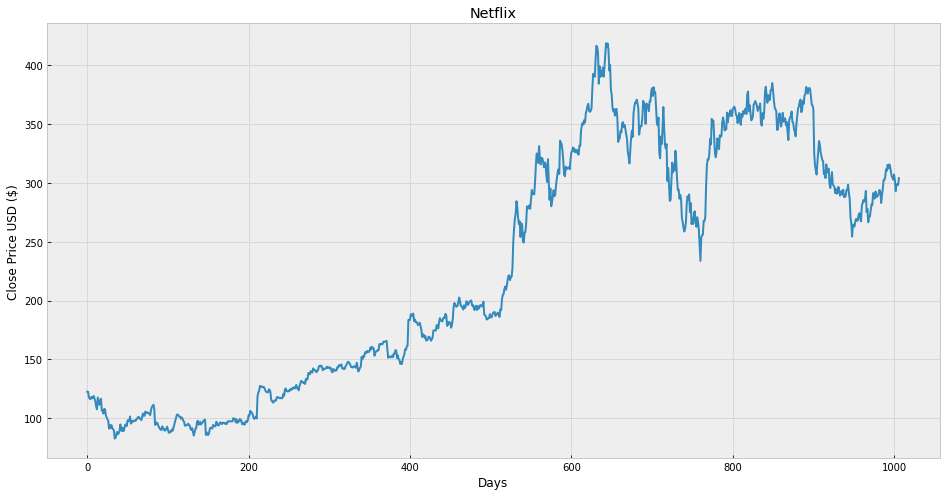

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [ ]:
#Get the close price
df = df[['Close']]
df.head()


,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [ ]:
#Create a variable to predict the 'x' days out in the future
future_days = 25

#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)

df.tail(4)

,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [ ]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [ ]:
#Split the data into 75% traing and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
#Create the models 
#Create the decsion tree regressor model

tree = DecisionTreeRegressor().fit(X_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)


In [ ]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regresion predicition
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[294.179993 292.01001  283.109985 289.619995 295.029999 302.570007
 302.600006 305.160004 311.690002 337.589996 315.549988 312.48999
 315.929993 315.929993 309.98999  306.160004 304.320007 267.619995
 284.25     246.389999 293.119995 284.25     298.440002 328.529999
 271.269989]

[277.6535489  274.09431292 271.05848397 283.38262085 285.71419502
 288.18854252 286.97040597 288.90229496 295.63060795 278.45294878
 281.07004105 270.2590841  274.61771995 274.8366145  279.89950514
 284.69590059 284.07732085 293.82244081 289.97768673 289.40667906
 295.1642697  290.56771732 291.10064962 292.03329661 293.93663644]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


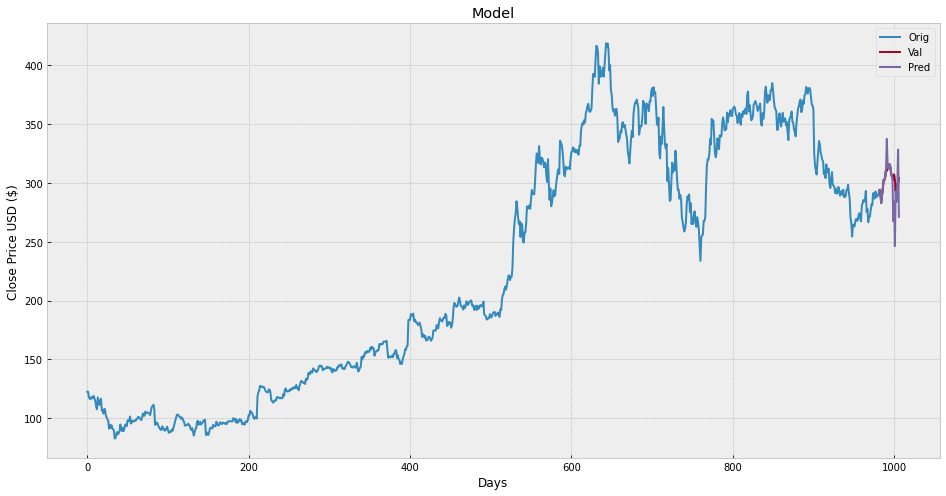

In [ ]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()
